# Final position in variable interval


## Dependencies


The dependencies used are as follows


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer

import sys

sys.path.append("..")

from utils.visualization import model_test
from utils.custom_cvs import VariableTimeSeriesSplit
from utils.custom_scorers import (
    balanced_accuracy_1interval_score,
    mean_absolute_1interval_error,
)

import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import warnings

warnings.simplefilter("ignore")

## Initialization


First we will do the validation of the model that predicts the final position of each driver at a ±1 interval.


In [2]:
df = pd.read_csv("../assets/data/processed/outliers.csv")

mid_rc = df.groupby("raceYear")["raceRound"].max().to_numpy() // 2
get_half = lambda x: f'{x["raceYear"]}{x["raceRound"] <= mid_rc[x["raceYear"] - 2006]}'
instances_per_half = df.apply(get_half, axis=1).value_counts(sort=False).to_numpy()

n_splits = len(instances_per_half) - 10
max_train_size = [instances_per_half[i : 10 + i].sum() for i in range(n_splits)]
test_size = instances_per_half[10:].tolist()
tscv = VariableTimeSeriesSplit(
    n_splits=n_splits, max_train_size=max_train_size, test_size=test_size
)

scorers = [
    make_scorer(balanced_accuracy_1interval_score),
    make_scorer(mean_absolute_1interval_error, greater_is_better=False),
]

X = pd.read_csv("../assets/data/processed/outliers_X.csv")
y = df["positionFinal"]

## K-Nearest Neighbors


KNeighborsClassifier(metric='manhattan', n_neighbors=100):
CV with make_scorer(balanced_accuracy_1interval_score): 0.377008268147974
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -2.3573625305481314
              precision    recall  f1-score   support

           1       0.60      0.81      0.69       252
           2       0.59      0.80      0.68       252
           3       0.57      0.56      0.56       252
           4       0.51      0.43      0.47       252
           5       0.41      0.39      0.40       252
           6       0.39      0.48      0.43       252
           7       0.35      0.43      0.39       252
           8       0.39      0.30      0.34       252
           9       0.34      0.26      0.29       251
          10       0.30      0.25      0.28       252
          11       0.25      0.25      0.25       250
          12       0.31      0.39      0.35       247
          13       0.27      0.36      0.31       244
          14 

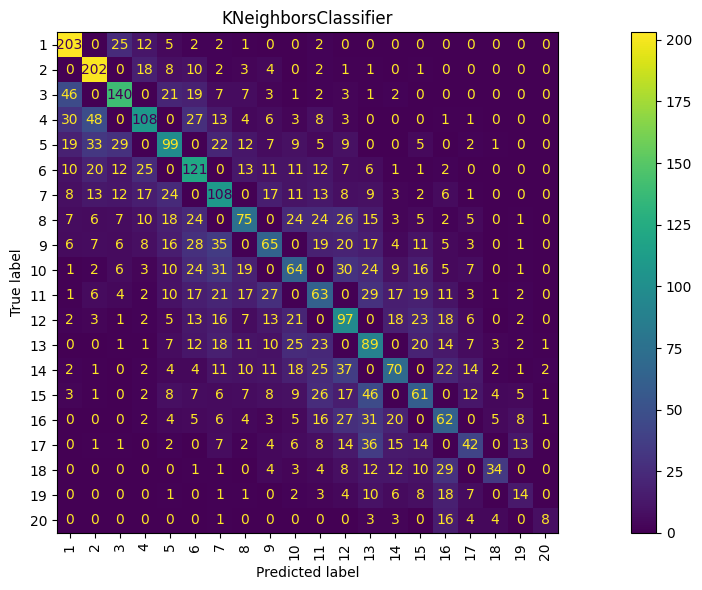

In [3]:
X_selected = X[
    [
        "positionGrid",
        "constructorRef",
        "driverWins",
    ]
]
knn = KNeighborsClassifier(n_neighbors=100, metric="manhattan", weights="uniform")
model_test((knn,), X_selected, y, tscv, scorers=scorers, interval=1)

KNeighborsClassifier(metric='manhattan', n_neighbors=100):
CV with make_scorer(balanced_accuracy_1interval_score): 0.29805702307572796
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -2.942270218498124
              precision    recall  f1-score   support

           1       0.54      0.76      0.63       252
           2       0.68      0.60      0.64       252
           3       0.48      0.34      0.40       252
           4       0.40      0.31      0.35       252
           5       0.32      0.30      0.31       252
           6       0.24      0.37      0.30       252
           7       0.27      0.37      0.32       252
           8       0.22      0.30      0.26       252
           9       0.31      0.29      0.30       251
          10       0.22      0.30      0.25       252
          11       0.24      0.34      0.28       250
          12       0.24      0.28      0.25       247
          13       0.28      0.29      0.28       244
          14

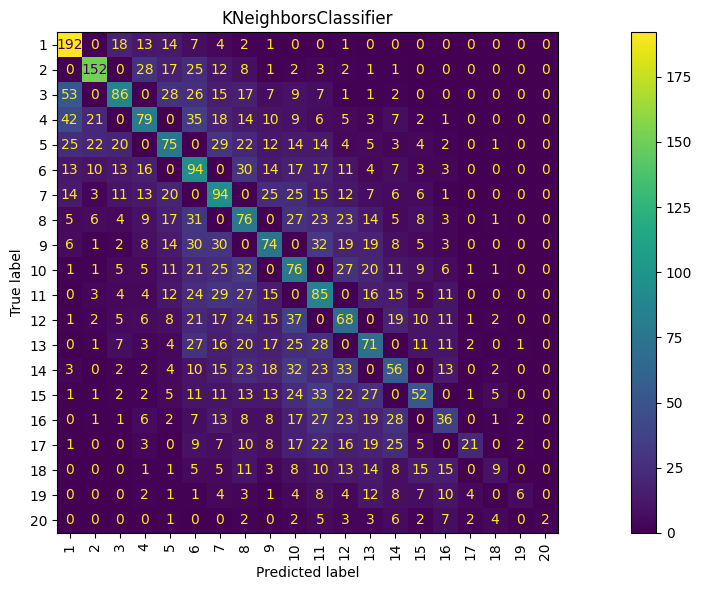

In [4]:
knn = KNeighborsClassifier(n_neighbors=100, metric="manhattan", weights="uniform")
model_test((knn,), X, y, tscv, scorers=scorers, interval=1)

## Decision Tree


DecisionTreeClassifier(criterion='log_loss', max_depth=4):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3767761252049177
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -2.3212225535043465
              precision    recall  f1-score   support

           1       0.71      0.78      0.74       252
           2       0.71      0.77      0.74       252
           3       0.53      0.64      0.58       252
           4       0.48      0.52      0.50       252
           5       0.41      0.39      0.40       252
           6       0.47      0.41      0.44       252
           7       0.28      0.37      0.32       252
           8       0.40      0.36      0.38       252
           9       0.26      0.27      0.27       251
          10       0.42      0.23      0.30       252
          11       0.36      0.29      0.32       250
          12       0.27      0.46      0.34       247
          13       0.28      0.45      0.35       244
          14

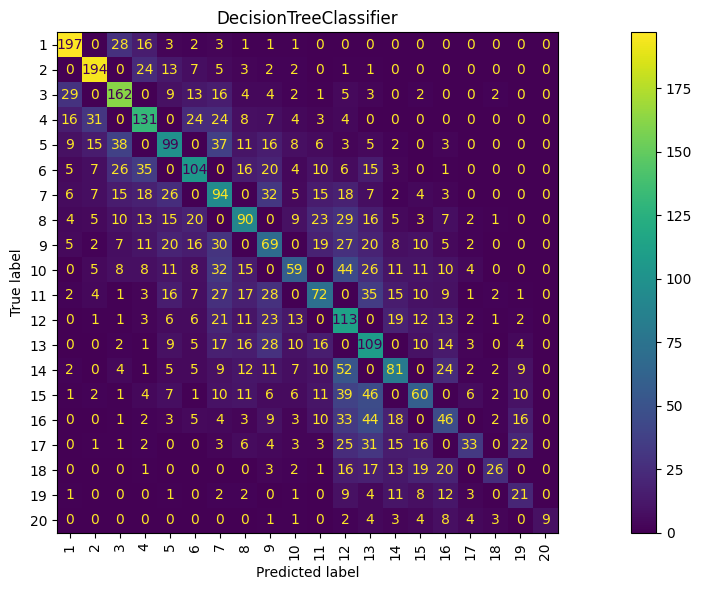

In [5]:
X_selected = X[
    [
        "carNumber",
        "positionGrid",
        "driverNationality",
        "constructorNationality",
        "raceYear",
        "raceRound",
        "grandPrix",
        "raceTime",
        "circuitRef",
        "circuitLocation",
        "circuitLng",
        "circuitAlt",
        "constructorWins",
        "q1",
        "q2",
        "q3",
        "driverAgeToday",
    ]
]
tree = DecisionTreeClassifier(max_depth=4, criterion="log_loss", splitter="best")
model_test((tree,), X_selected, y, tscv, scorers=scorers, interval=1)

DecisionTreeClassifier(criterion='log_loss', max_depth=4):
CV with make_scorer(balanced_accuracy_1interval_score): 0.37536475342396397
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -2.3430724984772007
              precision    recall  f1-score   support

           1       0.70      0.79      0.74       252
           2       0.71      0.76      0.73       252
           3       0.57      0.62      0.59       252
           4       0.45      0.52      0.48       252
           5       0.40      0.42      0.41       252
           6       0.39      0.46      0.42       252
           7       0.33      0.41      0.37       252
           8       0.39      0.32      0.35       252
           9       0.31      0.24      0.27       251
          10       0.39      0.19      0.26       252
          11       0.33      0.28      0.30       250
          12       0.30      0.47      0.36       247
          13       0.29      0.45      0.35       244
          1

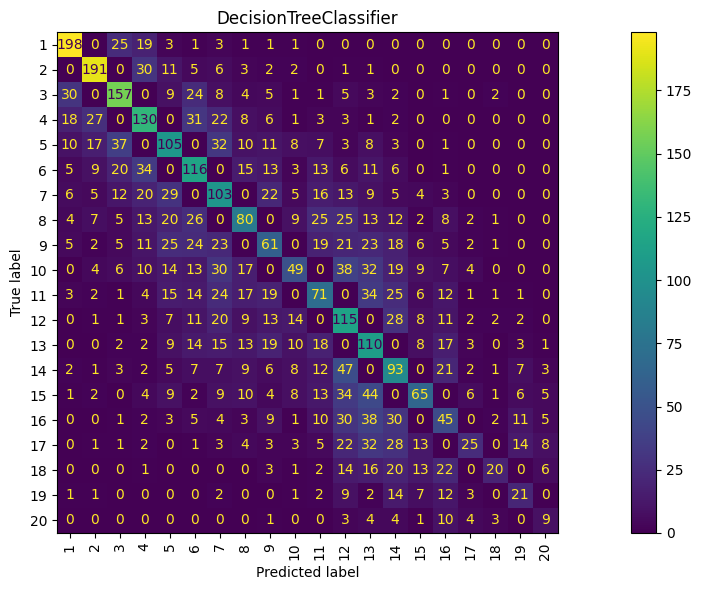

In [6]:
tree = DecisionTreeClassifier(max_depth=4, criterion="log_loss", splitter="best")
model_test((tree,), X, y, tscv, scorers=scorers, interval=1)

## Random Forest


RandomForestClassifier(criterion='log_loss', max_depth=5, n_estimators=432):
CV with make_scorer(balanced_accuracy_1interval_score): 0.40026825234449076
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -2.180639513680789
              precision    recall  f1-score   support

           1       0.66      0.83      0.73       252
           2       0.72      0.79      0.75       252
           3       0.56      0.63      0.59       252
           4       0.45      0.56      0.50       252
           5       0.46      0.41      0.44       252
           6       0.45      0.44      0.45       252
           7       0.33      0.42      0.37       252
           8       0.43      0.31      0.36       252
           9       0.33      0.24      0.28       251
          10       0.41      0.25      0.31       252
          11       0.36      0.41      0.39       250
          12       0.22      0.45      0.30       247
          13       0.43      0.45      0.44     

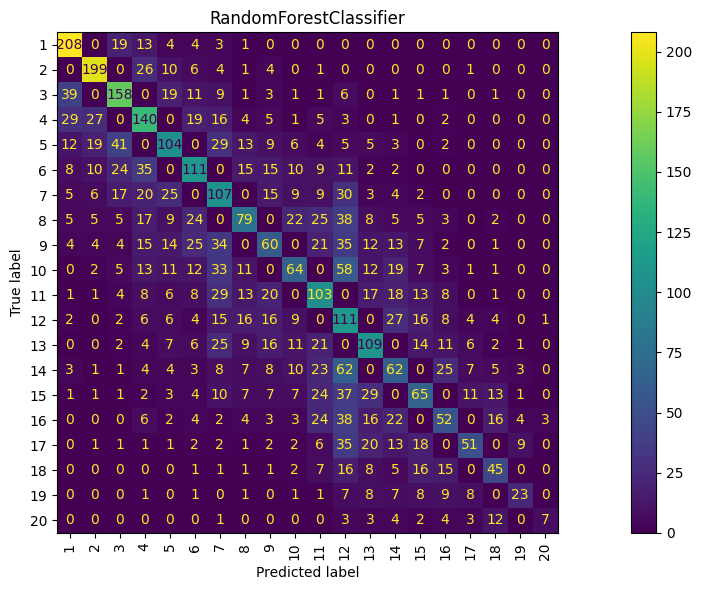

In [7]:
X_selected = X[
    [
        "carNumber",
        "positionGrid",
        "driverRef",
        "constructorNationality",
        "raceRound",
        "driverWins",
    ]
]
random_forest = RandomForestClassifier(
    max_depth=5, n_estimators=432, criterion="log_loss"
)
model_test((random_forest,), X_selected, y, tscv, scorers=scorers, interval=1)

RandomForestClassifier(criterion='log_loss', max_depth=5, n_estimators=432):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3776200510636785
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -2.293164908806548
              precision    recall  f1-score   support

           1       0.56      0.90      0.69       252
           2       0.71      0.80      0.75       252
           3       0.53      0.51      0.52       252
           4       0.45      0.46      0.46       252
           5       0.44      0.38      0.41       252
           6       0.33      0.42      0.37       252
           7       0.33      0.38      0.35       252
           8       0.46      0.28      0.35       252
           9       0.28      0.23      0.25       251
          10       0.38      0.27      0.31       252
          11       0.37      0.42      0.39       250
          12       0.23      0.44      0.30       247
          13       0.41      0.43      0.42      

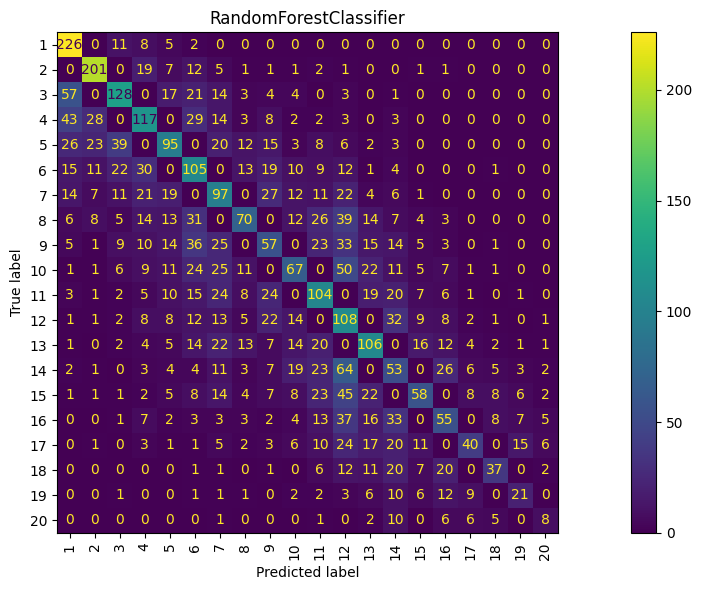

In [8]:
random_forest = RandomForestClassifier(
    max_depth=5, n_estimators=432, criterion="log_loss"
)
model_test((random_forest,), X, y, tscv, scorers=scorers, interval=1)

## Multilayer Perceptron


MLPClassifier(activation='logistic', hidden_layer_sizes=(46, 27, 24)):
CV with make_scorer(balanced_accuracy_1interval_score): 0.3951594381328644
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -2.2057294201037125
              precision    recall  f1-score   support

           1       0.58      0.90      0.71       252
           2       0.68      0.76      0.72       252
           3       0.63      0.46      0.53       252
           4       0.50      0.45      0.47       252
           5       0.40      0.46      0.42       252
           6       0.40      0.50      0.44       252
           7       0.37      0.41      0.39       252
           8       0.38      0.31      0.34       252
           9       0.39      0.25      0.30       251
          10       0.35      0.34      0.35       252
          11       0.33      0.33      0.33       250
          12       0.28      0.36      0.32       247
          13       0.45      0.35      0.39       244


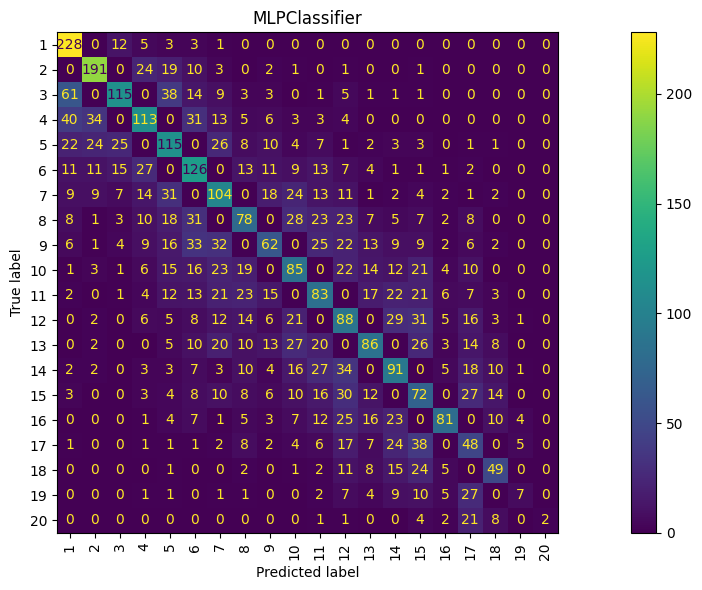

In [9]:
X_selected = X[
    [
        "positionGrid",
        "driverRef",
        "driverNumber",
        "constructorRef",
        "raceRound",
        "circuitCountry",
        "circuitAlt",
        "driverWins",
        "constructorWins",
        "driverAgeToday",
    ]
]
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(46, 27, 24))
model_test((nn,), X_selected, y, tscv, scorers=scorers, interval=1)

MLPClassifier(activation='logistic', hidden_layer_sizes=(46, 27, 24)):
CV with make_scorer(balanced_accuracy_1interval_score): 0.39699213750168333
CV with make_scorer(mean_absolute_1interval_error, greater_is_better=False): -2.2240685753967577
              precision    recall  f1-score   support

           1       0.55      0.89      0.68       252
           2       0.78      0.77      0.77       252
           3       0.59      0.42      0.49       252
           4       0.49      0.46      0.48       252
           5       0.43      0.42      0.43       252
           6       0.38      0.48      0.42       252
           7       0.37      0.47      0.41       252
           8       0.33      0.27      0.30       252
           9       0.47      0.25      0.33       251
          10       0.34      0.27      0.30       252
          11       0.29      0.36      0.32       250
          12       0.34      0.44      0.38       247
          13       0.32      0.37      0.34       244

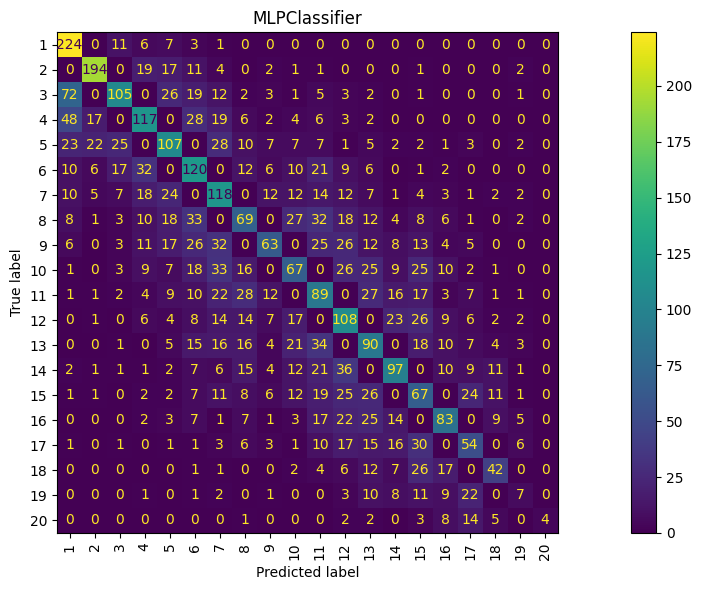

In [10]:
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(46, 27, 24))
model_test((nn,), X, y, tscv, scorers=scorers, interval=1)

## Results


The performance of the model has been significantly increased in all cases.
